
# Project: Investigate No-show appointments
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>

<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


In [5]:
# Use this cell to set up import statements for all of libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline





# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


 <a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

1-‘ScheduledDay’ tells us on what day the patient set up their appointment.

2-‘Neighborhood’ indicates the location of the hospital.

3-‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

4-Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
###

<a id='wrangling'></a>
## Data Wrangling

checking for cleanliness and then trim and clean the dataset for analysis

### General Properties

In [6]:
# Load data and print out a few lines.

df = pd.read_csv('noshowappointments2016.csv')
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#explore data shape (rows) and (columns)
df.shape

(110527, 14)

In [8]:
# basic information about the data
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
#summary for the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
#check if there is any duplicated in the data
df.duplicated().any()

False

In [11]:
#check the null values in the data
df.isnull()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## In this dataset there aren't duplicated or null data and that is great


### Data Cleaning 

In [12]:
#droped the data we don't need
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis= 1, inplace= True)

In [13]:
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
#correct the spelling 
df.rename({'Hipertension' : 'Hypertension', 'No-show' : 'show'}, axis= 1, inplace= True)

In [15]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

After we have trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions 



# let's see how many patient attend

In [52]:
#how many patients attend
df['show'].value_counts()

No     88205
Yes    22316
Name: show, dtype: int64

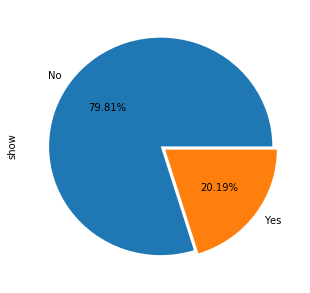

In [17]:
df.show.value_counts().plot.pie(figsize=(5,5), autopct='%.2f%%', explode=(0, .05))
plt.show()

# Question 1 : can gender affect on attend?

In [18]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [19]:
yshow = df.show == 'No'
noshow =df.show == 'Yes'

In [20]:
#count who show and noshow according to gender (femal,male)
df.groupby('Gender').show.value_counts()

Gender  show
F       No      57246
        Yes     14594
M       No      30962
        Yes      7725
Name: show, dtype: int64

# attend according to Gender

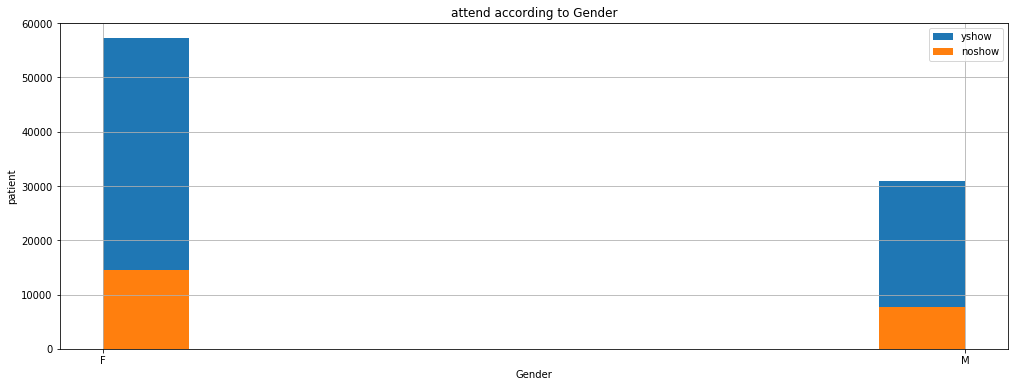

In [21]:
plt.figure(figsize=(17,6))
df.Gender[yshow].hist(alpha = 1, label = 'yshow')
df.Gender[noshow].hist(alpha = 1, label = 'noshow')

plt.title('attend according to Gender')
plt.xlabel('Gender')
plt.ylabel('patient')
plt.legend()

# About 22319 patients didn't attend ,there were 14594 femaleand 7725 male  didn't attend  .This mean that the ratio betwwen female and male is 26% for femal and 24% for male .This ratio doesn't affect on attendance

# Question 2: Can age affect on attend?

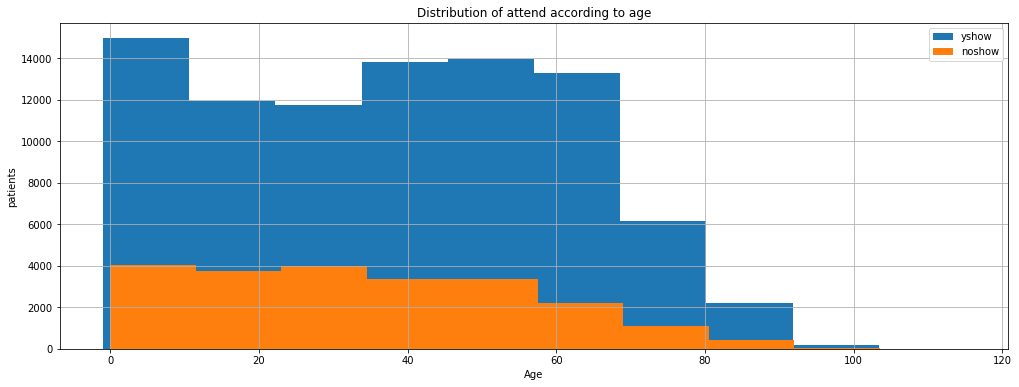

In [22]:
plt.figure(figsize = (17,6))
df.Age[yshow].hist(alpha = 1, label = 'yshow')
df.Age[noshow].hist(alpha = 1,label ='noshow')
plt.title('Distribution of attend according to age')
plt.xlabel('Age')
plt.ylabel('patients')
plt.legend()

# The visulazation show that our dataset contains age group below zero.

In [23]:
# we will check the data below 0

df[df['Age'] < 0]


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


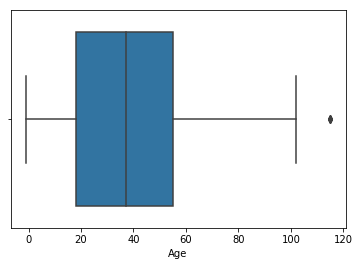

In [24]:
# create a boxplot of the age 
sns.boxplot(df.Age)
plt.show()


# The boxplot show that there are outliers at the high end of the range

In [25]:
#the age more than 100
df[df.Age > 100]


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,show
58014,F,102,CONQUISTA,0,0,0,0,0,0,No
63912,F,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,F,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,F,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,F,115,ANDORINHAS,0,0,0,0,1,0,No
90372,F,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,F,115,SÃO JOSÉ,0,1,0,0,0,1,No


# There are two patients who were 115 years old and this is  very rare, and can't  find any verifications that Brazil has the 115 years old.dropping these entries along with the -1 patient will ensure that they don't cause any outlier affects

In [26]:
# Trim the outliers
df = df[(df.Age > -1) & (df.Age < 115)]


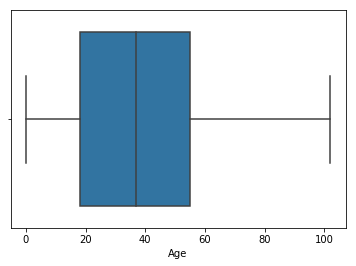

In [27]:
# display the boxplot again
sns.boxplot(df.Age)
plt.show()

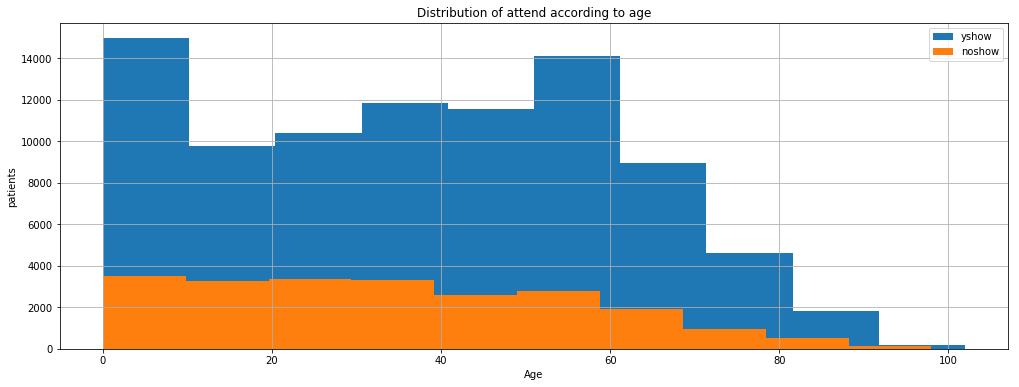

In [28]:
plt.figure(figsize = (17,6))
df.Age[yshow].hist(alpha = 1, label = 'yshow')
df.Age[noshow].hist(alpha = 1,label ='noshow')
plt.title('Distribution of attend according to age')
plt.xlabel('Age')
plt.ylabel('patients')
plt.legend()

In [29]:
# print the mean age for extra information
print('Mean age: {:.2f}'.format(df.Age.mean()))

Mean age: 37.09


In [30]:
# print the mean age for extra information
print('attendance Mean Age:{:.2f}'.format(df[yshow].Age.mean()))
print('not attendance Appointments Mean Age:{:.2f}'.format(df[noshow].Age.mean()))

attendance Mean Age:37.79
not attendance Appointments Mean Age:34.31


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


# We notice that generally the ages the patients who show up their appointment is greater than who didn't,and we can also notice this in the means of ages, the mean age for patients who show up = 37.79, and for who did not = 34.31 years

### QUESTION 3: Can neighbourhood affect on attend?

In [31]:
df['Neighbourhood'].value_counts()


JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2258
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1976
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [32]:
df.groupby('Neighbourhood')['show'].value_counts()


Neighbourhood        show
AEROPORTO            No         7
                     Yes        1
ANDORINHAS           No      1740
                     Yes      518
ANTÔNIO HONÓRIO      No       221
                     Yes       50
ARIOVALDO FAVALESSA  No       220
                     Yes       62
BARRO VERMELHO       No       332
                     Yes       91
BELA VISTA           No      1523
                     Yes      384
BENTO FERREIRA       No       665
                     Yes      193
BOA VISTA            No       254
                     Yes       58
BONFIM               No      2223
                     Yes      550
CARATOÍRA            No      1974
                     Yes      591
CENTRO               No      2631
                     Yes      703
COMDUSA              No       254
                     Yes       56
CONQUISTA            No       689
                     Yes      160
CONSOLAÇÃO           No      1139
                     Yes      237
CRUZAMENTO           N

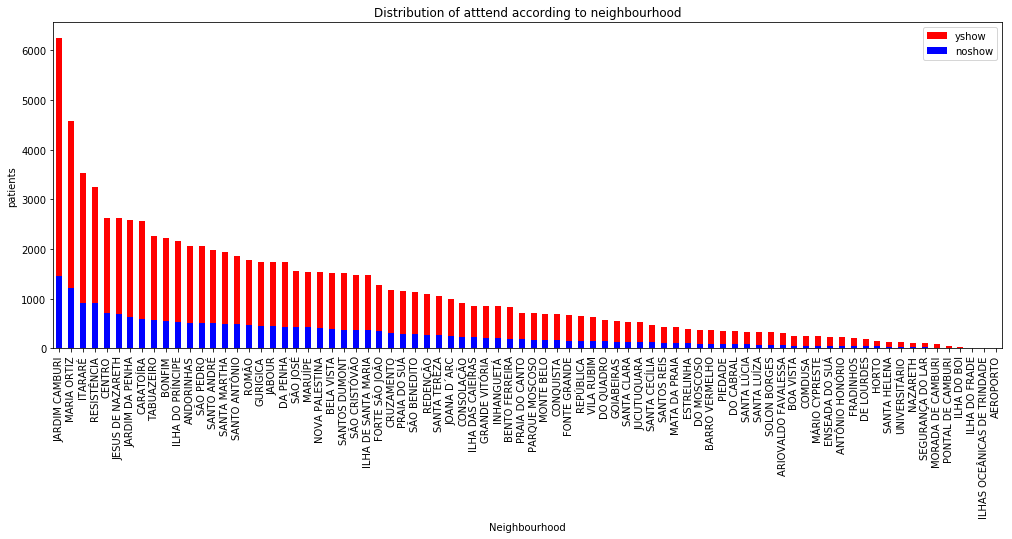

In [33]:
plt.figure(figsize = (17,6))
df.Neighbourhood[yshow].value_counts().plot(kind= 'bar', color= 'red', alpha= 1, label = 'yshow')
df.Neighbourhood[noshow].value_counts().plot(kind= 'bar', color= 'blue', alpha= 1,label ='noshow')
plt.title('Distribution of atttend according to neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('patients')
plt.legend()

# The neighbourhood is heighly affect on th attendance of patients,all the neigbourhoods have an attendance rate above 70%.


# Question 4 : can scholarship affect on attend?

In [34]:
df['Scholarship'].value_counts()

0    99660
1    10861
Name: Scholarship, dtype: int64

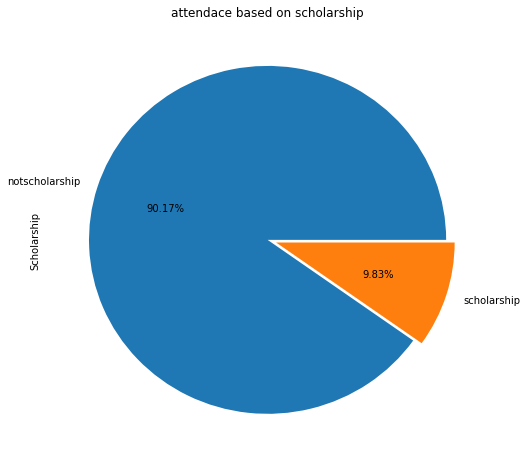

In [35]:
#attendance of patients who received sms and patients didn't received
df['Scholarship'].value_counts().plot.pie(figsize=(8, 8), labels=['notscholarship', 'scholarship'], autopct='%.2f%%', explode=(0, .05))

plt.title('attendace based on scholarship')
plt.show()

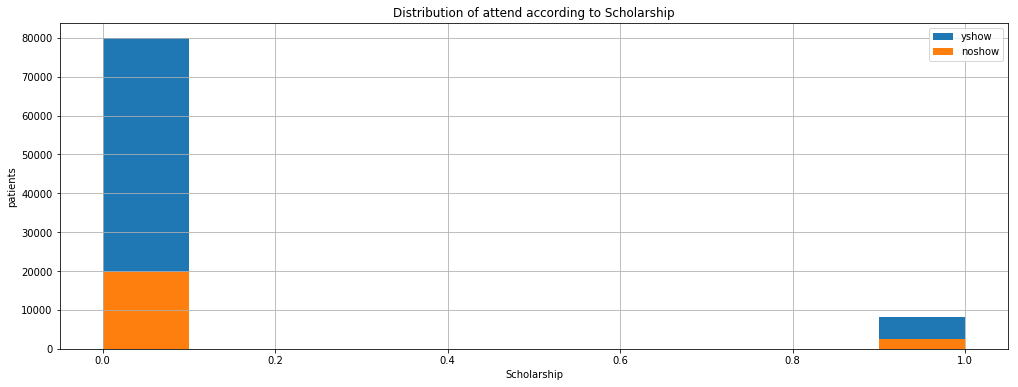

In [36]:
plt.figure(figsize = (17,6))
df.Scholarship[yshow].hist(alpha = 1, label = 'yshow')
df.Scholarship[noshow].hist(alpha = 1,label ='noshow')
plt.title('Distribution of attend according to Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('patients')
plt.legend()

In [37]:
df.Scholarship[yshow].value_counts()


0    79922
1     8283
Name: Scholarship, dtype: int64

df.Scholarship[noshow].value_counts()


### 80% of patients who haven't received Scholarship attend and 76% of patients who have received scholarship attend, It seems that patients being covered by Bolsa Família, a social welfare program in Brazil, were less likely to attend their appointments than those who without welfare.



# Question 5: Hypertension and the attend?

In [38]:
df['Hypertension'].value_counts()

0    88721
1    21800
Name: Hypertension, dtype: int64

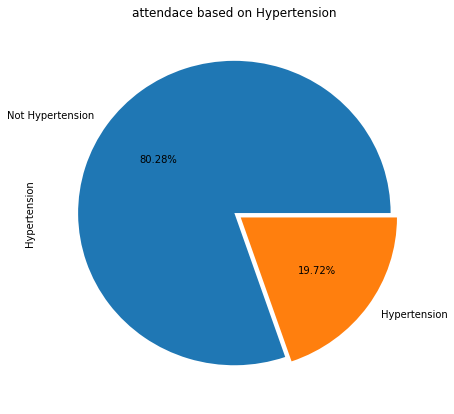

In [39]:
#attendance of Hypertension Patients and non Hypertension
df['Hypertension'].value_counts().plot.pie(figsize=(7, 7), labels=['Not Hypertension', 'Hypertension'], autopct='%.2f%%', explode=(0, .05))

plt.title('attendace based on Hypertension')
plt.show()

# Pie Chart that about 20% of the Clinic's Appointments were for Hypertension Patients.



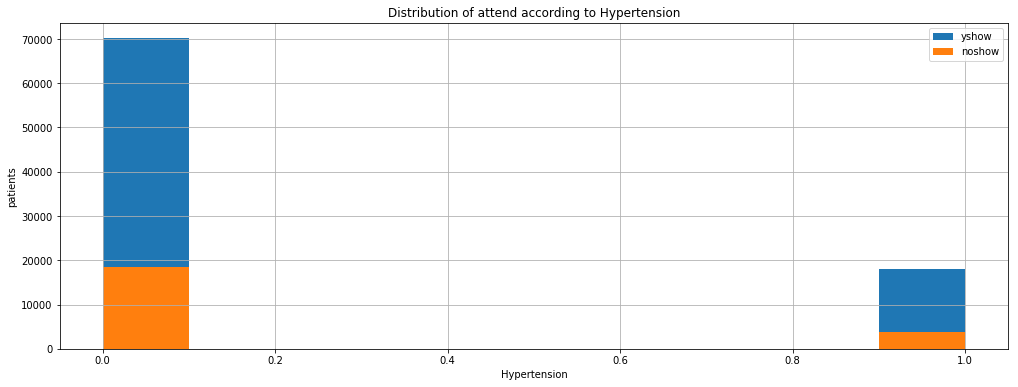

In [40]:
plt.figure(figsize = (17,6))
df.Hypertension[yshow].hist(alpha = 1, label = 'yshow')
df.Hypertension[noshow].hist(alpha = 1,label ='noshow')
plt.title('Distribution of attend according to Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('patients')
plt.legend()

# Hypertension Patients are less  to be a attend in comparison to Non Hypertensive Patients.

# Question 6: Diabets and attend?

In [41]:
df['Diabetes'].value_counts()

0    102578
1      7943
Name: Diabetes, dtype: int64

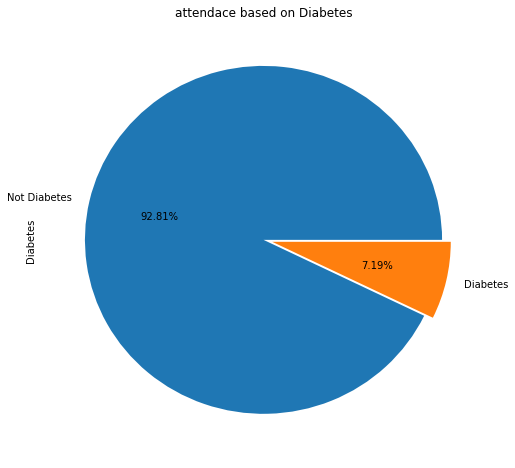

In [42]:
#attendance of diabetes Patients and non diabetes
df['Diabetes'].value_counts().plot.pie(figsize=(8, 8), labels=['Not Diabetes', 'Diabetes'], autopct='%.2f%%', explode=(0, .05))

plt.title('attendace based on Diabetes')
plt.show()

In [ ]:
# we can see that the pa are for Not Diabetic Patients 92.81% and the diabetes are onle 7.19%

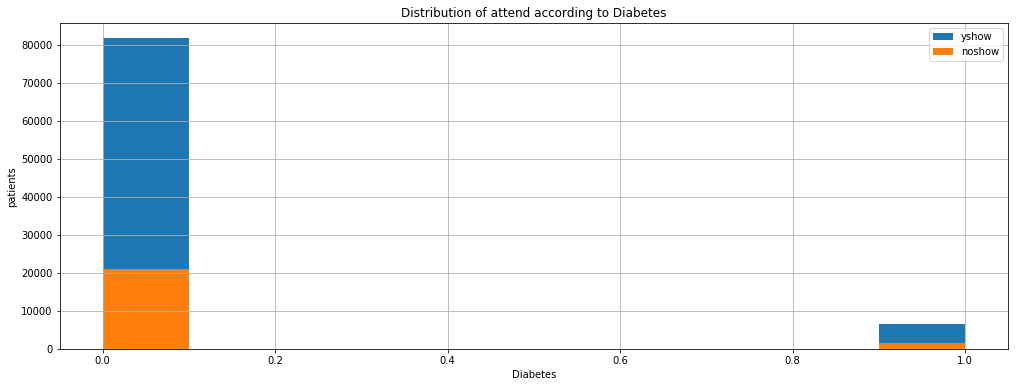

In [43]:
plt.figure(figsize = (17,6))
df.Diabetes[yshow].hist(alpha = 1, label = 'yshow')
df.Diabetes[noshow].hist(alpha = 1,label ='noshow')
plt.title('Distribution of attend according to Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('patients')
plt.legend()

# Diabetic Patients didn't affect on attendance


# Question 7 :Alcoholism and attend?

In [44]:
df['Alcoholism'].value_counts()

0    107161
1      3360
Name: Alcoholism, dtype: int64

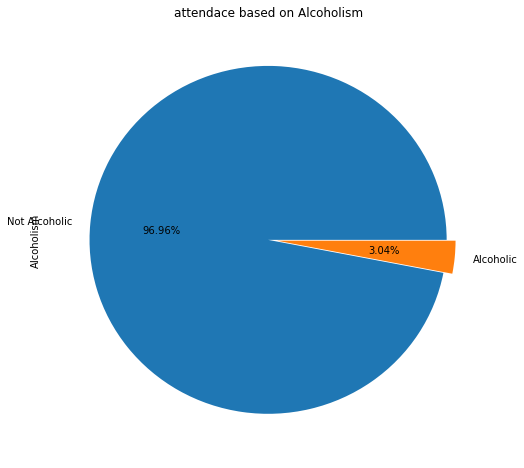

In [45]:
#attendance of an Alocholic Patient and Non-Alcoholic Patient
df['Alcoholism'].value_counts().plot.pie(figsize=(8, 8), labels=['Not Alcoholic', 'Alcoholic'], autopct='%.2f%%', explode=(0, .05))

plt.title('attendace based on Alcoholism')
plt.show()

# patients are  Alcoholic Patients only 3% of the total appointments

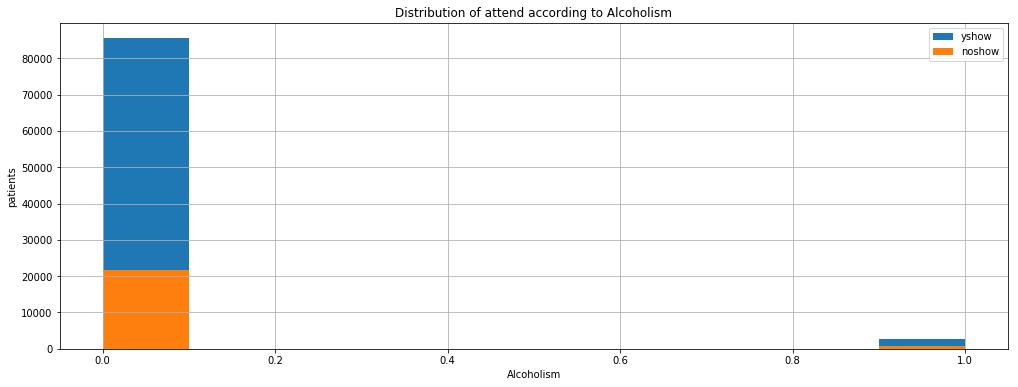

In [46]:
plt.figure(figsize = (17,6))
df.Alcoholism[yshow].hist(alpha = 1, label = 'yshow')
df.Alcoholism[noshow].hist(alpha = 1,label ='noshow')
plt.title('Distribution of attend according to Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('patients')
plt.legend()

# From visulization we can see that No Relation  between Alcoholism and attendence. It seems that having alcoholism is not a factor affecting patients' attendance.



# Question 8: Handcap and the attend?

In [47]:
df['Handcap'].value_counts()

0    108284
1      2038
2       183
3        13
4         3
Name: Handcap, dtype: int64

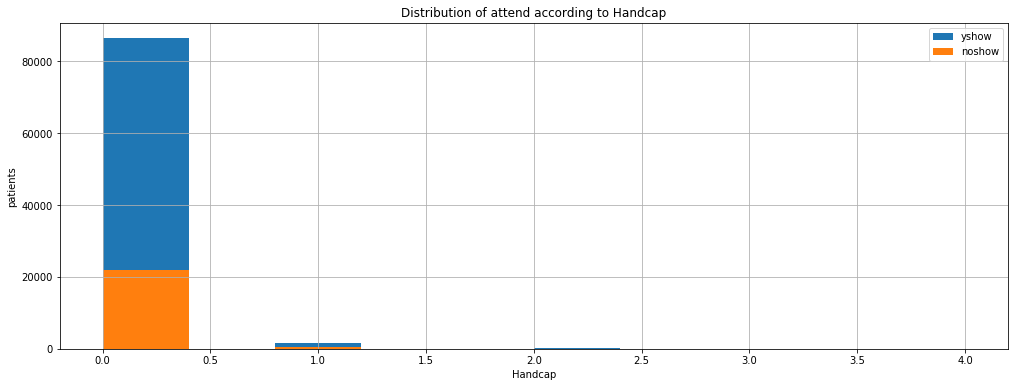

In [48]:
plt.figure(figsize = (17,6))
df.Handcap[yshow].hist(alpha = 1, label = 'yshow')
df.Handcap[noshow].hist(alpha = 1,label ='noshow')
plt.title('Distribution of attend according to Handcap')
plt.xlabel('Handcap')
plt.ylabel('patients')
plt.legend()

# Handcap didn't affect on attendance

In [49]:
df['SMS_received'].value_counts()

0    75040
1    35481
Name: SMS_received, dtype: int64

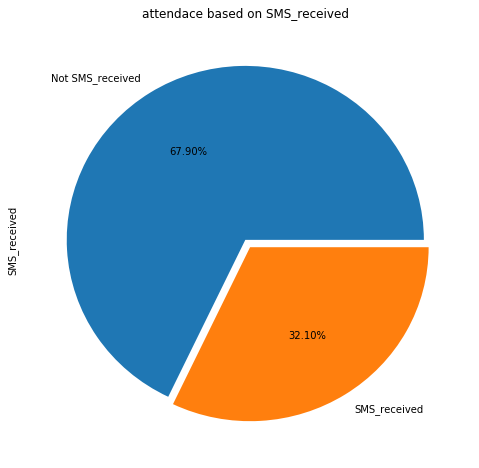

In [50]:
#attendance of patients who received sms and patients didn't received
df['SMS_received'].value_counts().plot.pie(figsize=(8, 8), labels=['Not SMS_received', 'SMS_received'], autopct='%.2f%%', explode=(0, .05))

plt.title('attendace based on SMS_received')
plt.show()

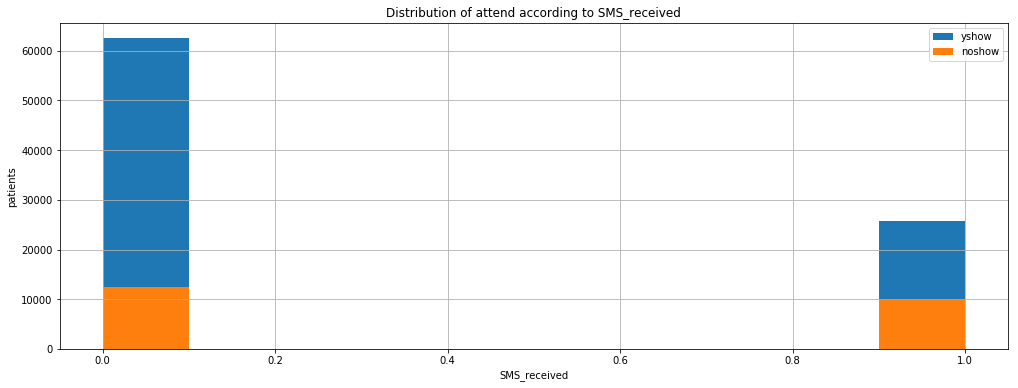

In [51]:
plt.figure(figsize = (17,6))
df.SMS_received[yshow].hist(alpha = 1, label = 'yshow')
df.SMS_received[noshow].hist(alpha = 1,label ='noshow')
plt.title('Distribution of attend according to SMS_received')
plt.xlabel('SMS_received')
plt.ylabel('patients')
plt.legend()

# SMS_received is not a major factor that is influencing the percentage of attendance because patients without receiving SMS showed up to the appointment. Sending SMS doesn’t really help patients to attend. Therefore, SMS hardly has an effect on attendance.

<a id='conclusions'></a>
## Conclusions

About 22319 patients didn't attend ,there were 14594 femaleand 7725 male didn't attend .This mean that the ratio betwwen female and male is 26% for femal and 24% for male .This ratio doesn't affect on attendance

We notice that generally the ages the patients who show up their appointment is greater than who didn't,and we can also notice this in the means of ages, the mean age for patients who show up = 37.79, and for who did not = 34.31 years

The neighbourhood is heighly affect on th attendance of patients,all the neigbourhoods have an attendance rate above 70%.few neighbourhoods are more likely to escape from their attendance than others. so a major factor that influence attendance is neighbourhood



we can see most of people who has Scholarship are most likely to miss thier appointments with a percentage of 76.2% of showing and patients who don't have a scholarship have the percentage 80.1%,  It seems that patients being covered by Bolsa Família, a social welfare program in Brazil, were less likely to attend their appointments than those who without welfare.

Hypertension Patients are less to be a attend in comparison to Non Hypertensive Patients.

Hypertension is observed more followed by diabetes,Alcoholism,Handcap.

Diabetic Patients didn't affect on attendance

patients are Alcoholic Patients only 3% of the total appointments,  we can see that No Relation between Alcoholism and attendence. It seems that having alcoholism is not a factor affecting patients' attendance.

Handcap didn't affect on attendance


SMS_received is not a major factor that is influencing the percentage of attendance because patients without receiving SMS showed up to the appointment. Sending SMS doesn’t really help patients to attend. Therefore, SMS hardly has an effect on attendance.


The investigation carried out in this study is exploratory and could provide insights for future, we should notice that the above obervations are only applied to the nominated hospital in Brazil. Also, some limitations of this study are as following:

110503 appointments for 62286 patients as sample is investigated. We do not know the number of the population. Therefore, all statistics done are only descriptive.
95% of analysis are merely looked at the relationship between attendance and one factor. The interrelationship between different features are not (sufficiently) investigated

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0